# **Lab 03: PCA**

**Objective:** In this assignment, you will delve into the practical application of Principal Component Analysis (PCA) for dimensionality reduction and feature extraction. You will use a real-world dataset to implement PCA and gain insights into its effectiveness in reducing the dimensionality of high-dimensional data while preserving its essential characteristics.

Dataset: https://www.kaggle.com/datasets/varunraskar/cancer-regression/data


In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **EDA**

In [579]:
# load the dataset
data_path_1 = '/content/cancer_reg.csv'
cancer_data = pd.read_csv(data_path_1)

data_path_2 = '/content/avg-household-size.csv'
avghhsize_data = pd.read_csv(data_path_2)

In [580]:
avghhsize_data.shape

(3220, 4)

In [581]:
avghhsize_data.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [582]:
avghhsize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [583]:
cancer_data.shape

(3047, 33)

In [584]:
cancer_data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [585]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

Chúng ta có thể thấy, hai tệp dữ liệu đều có cột 'geography' với dạng dữ liệu giống nhau. Do đó, chúng ta có thể gộp 2 tệp dữ liệu này thành một dựa trên cột này.

Merge 2 data:

In [586]:
# merge the datasets on the 'geography' column
merged_data = pd.merge(cancer_data, avghhsize_data, on='geography', how='inner')
merged_data.to_csv('cancer_avghhsize_merged.csv', index=False)

In [587]:
# load merged dataset
df = pd.read_csv('/content/cancer_avghhsize_merged.csv')

In [588]:
df.shape

(3047, 36)

In [589]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34


In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [591]:
df['geography'].duplicated().sum()

0

Không có bất kỳ dòng nào trùng lặp, điều này cho thấy mỗi observation chứa dữ liệu đại diện cho một khu vực riêng biệt của the United States. Mỗi khu vực đã được đánh mã vùng khác nhau nhờ 'countyfips', 'statefips', do đó 'geography' lúc này là không còn cần thiết.

In [592]:
df.drop(columns=['geography'], inplace=True, axis=1)

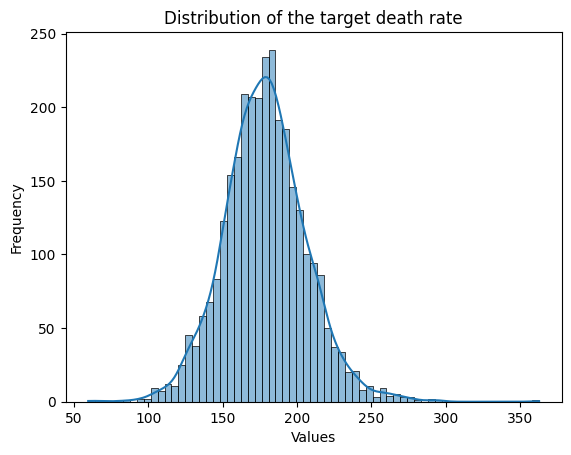

In [593]:
# checking distribution of target feature
sns.histplot(df['target_deathrate'], kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of the target death rate')
plt.show()

**Correlation matrix**

Để hiểu hơn về mối tương quan giữa các features:

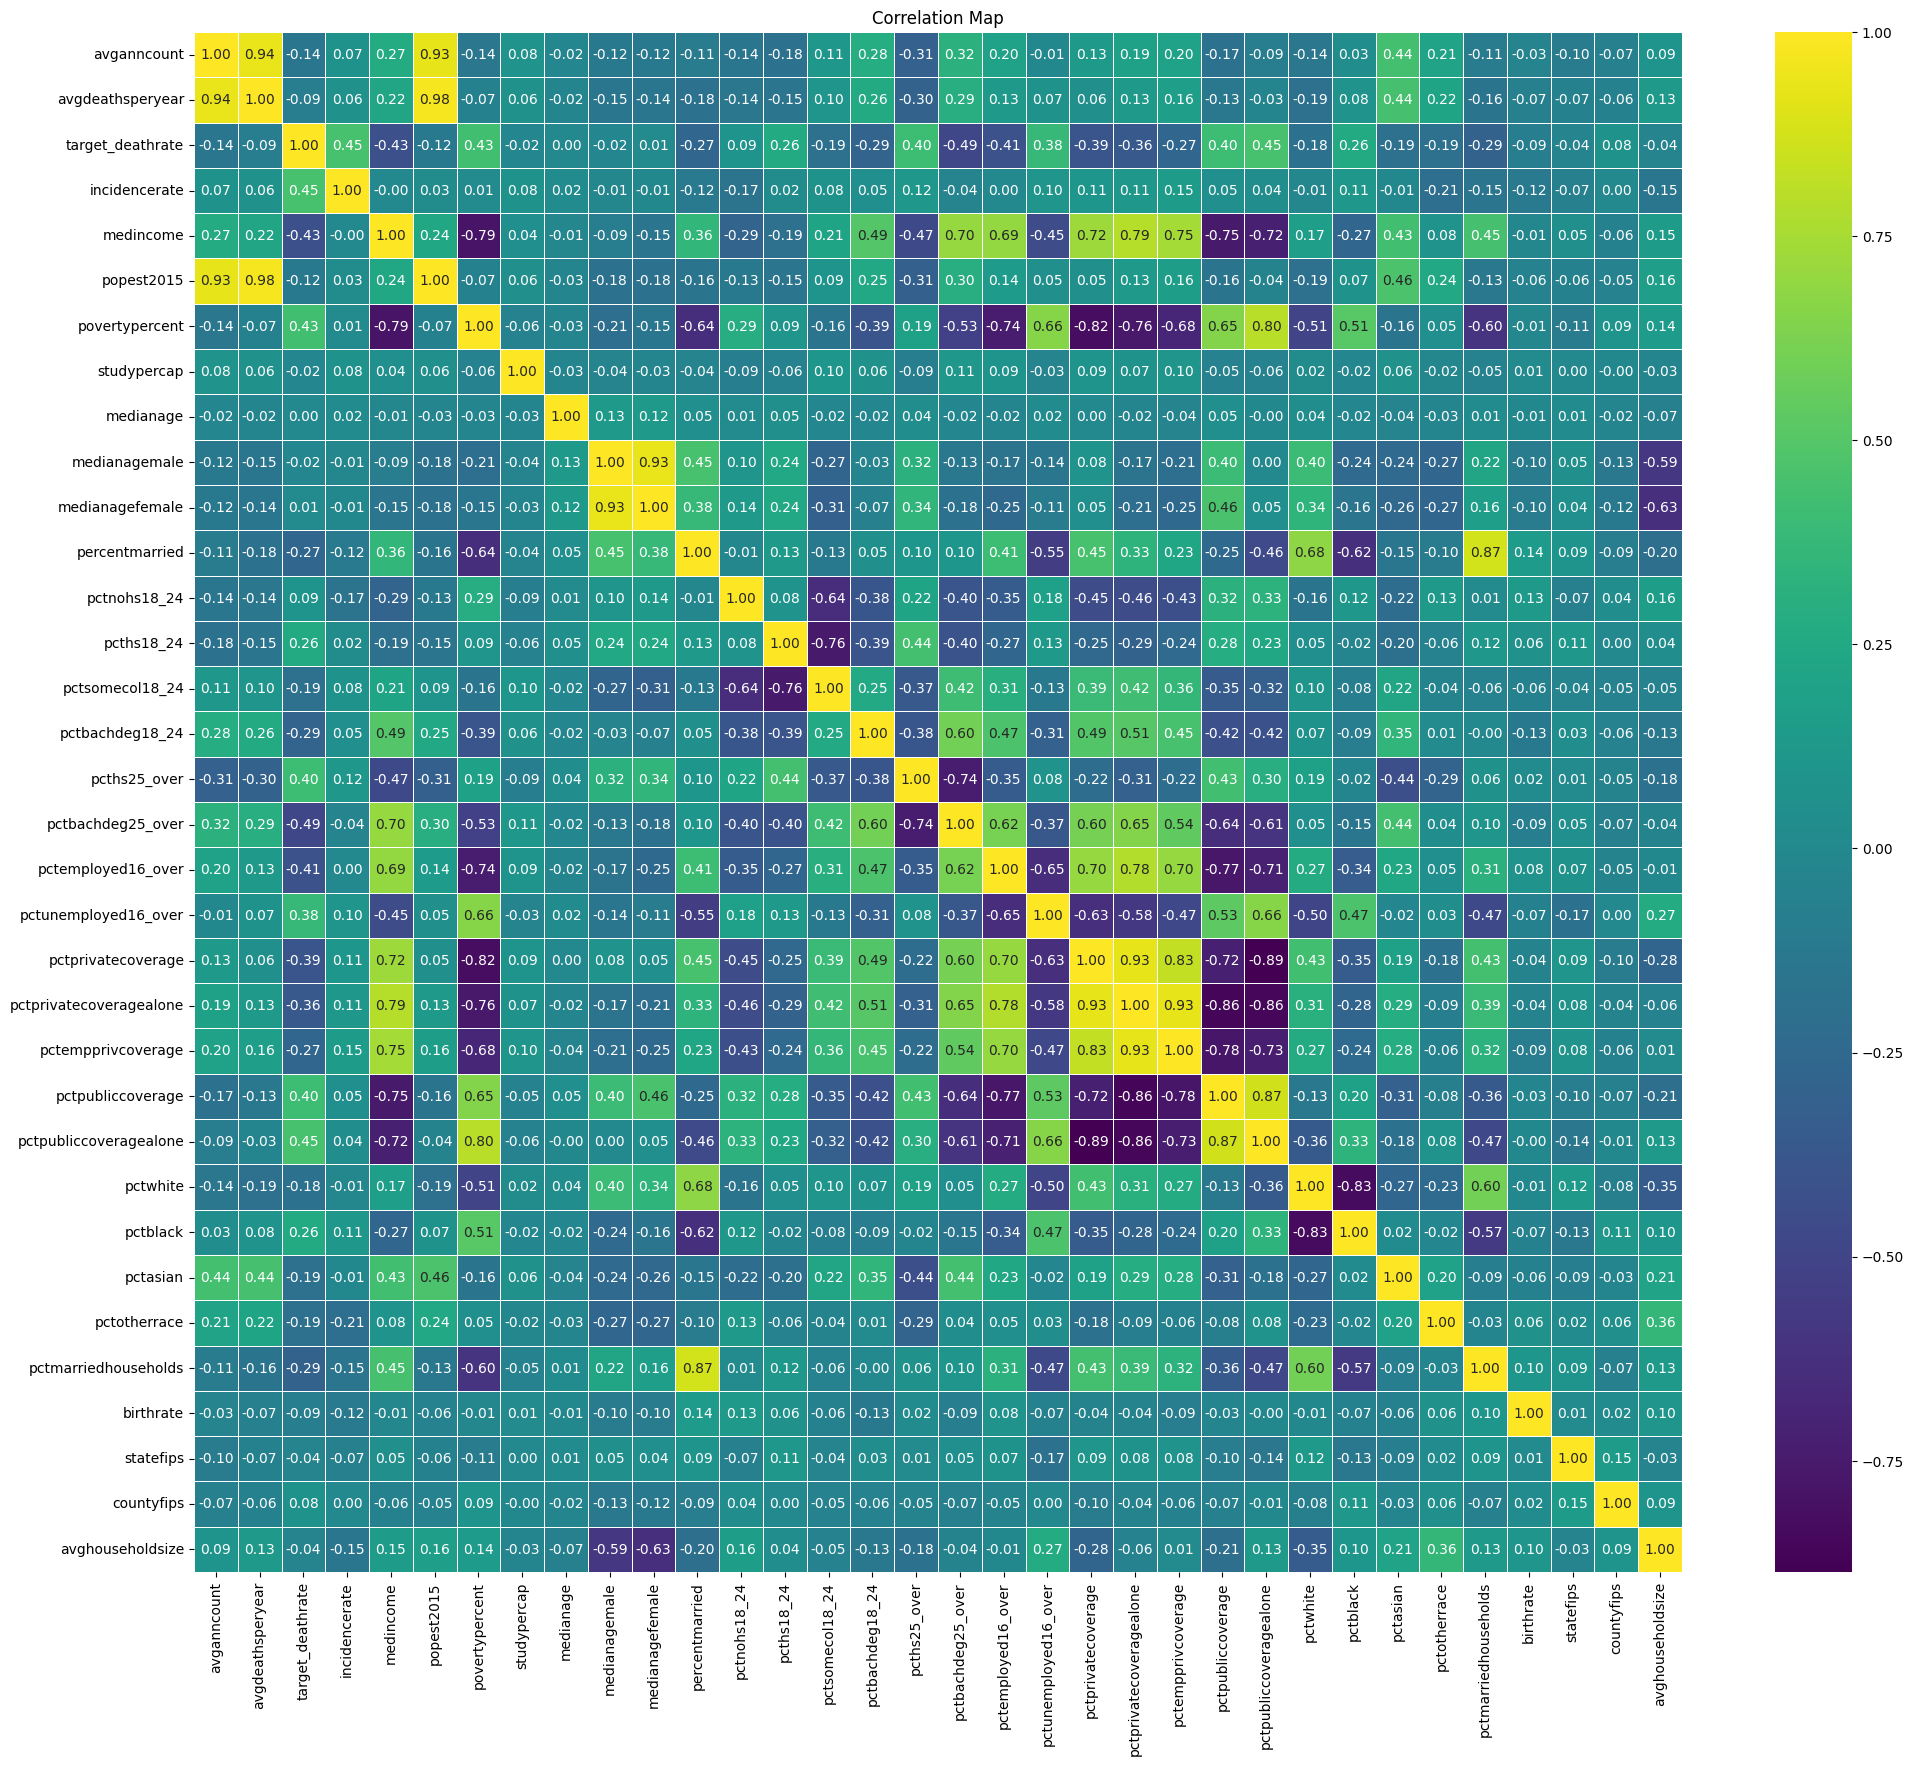

In [594]:
numeric_variables = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_variables.corr()

#correlation map
f,ax = plt.subplots(figsize = (24,20))
sns.heatmap(correlation_matrix, annot = True, linewidths = 0.5, fmt = ".2f", ax = ax, cmap = 'viridis')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('Correlation Map')
plt.show()

Qua heatmap ta có thể thấy, có nhiều biến có sự tương quan cao với nhau theo từng nhóm nhỏ. Chẳng hạn như nhóm các yếu tố 'medianage', 'medianmale', 'medianfemale' có sự tương quan đến 0.93, 0.98.

Do đó, ta có thể đi trực quan các biến này theo nhóm nhỏ để hiểu rõ về dữ liệu hơn:

### EDA into small group by correlation

In [595]:
# split into small group
cancer_related = df[['avganncount','avgdeathsperyear','incidencerate','studypercap']]
location_related = df[['popest2015','birthrate','countyfips','statefips']]
age = df[['medianage','medianagemale','medianagefemale']]
income = df[['medincome','binnedinc','povertypercent']]
household = df[['avghouseholdsize','pctmarriedhouseholds','percentmarried']]
education = df[['pctnohs18_24','pcths18_24','pctsomecol18_24','pctbachdeg18_24','pcths25_over','pctbachdeg25_over']]
insurance_coverage = df[['pctprivatecoverage','pctprivatecoveragealone','pctempprivcoverage','pctpubliccoverage','pctpubliccoveragealone']]
ethnicity = df[['pctwhite','pctblack','pctasian','pctotherrace']]
employment = df[['pctemployed16_over','pctunemployed16_over']]


#### location_related

In [596]:
location_related.describe()

,popest2015,birthrate,countyfips,statefips
count,3.047000e+03,3047.000000,3047.000000,3047.000000
mean,1.026374e+05,5.640306,101.802429,30.272071
std,3.290592e+05,1.985816,104.315612,15.054873
min,8.270000e+02,0.000000,1.000000,1.000000
25%,1.168400e+04,4.521419,35.000000,19.000000
50%,2.664300e+04,5.381478,79.000000,29.000000
75%,6.867100e+04,6.493677,133.000000,45.000000
max,1.017029e+07,21.326165,840.000000,56.000000


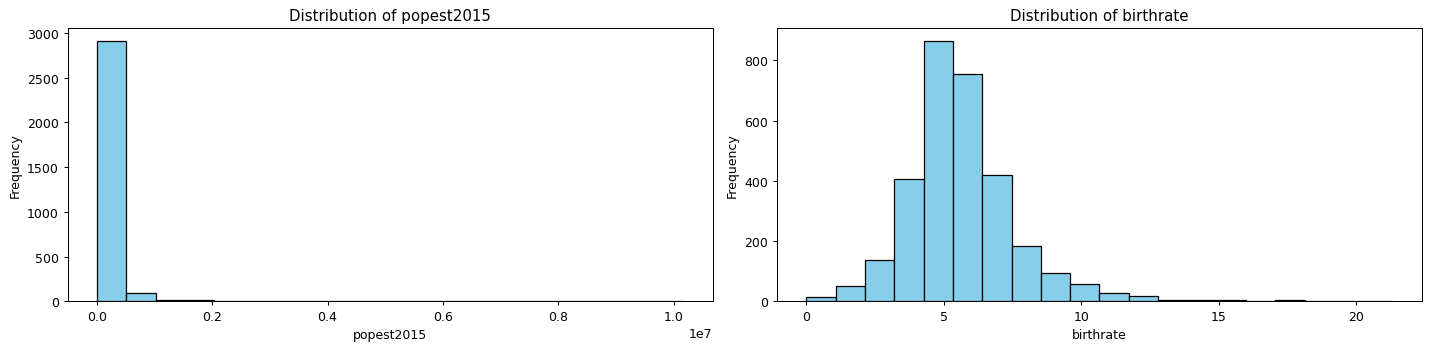

In [597]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), dpi=90)

for i, col in enumerate(['popest2015',	'birthrate']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Đồ thị phân phối của dữ liệu 'popest2015' lệch hẳn sang trái, cho thấy hầu hết các quận, thành phố đều có dân số như nhau. Chỉ có một số rất ít quận, thành phố có dân số cao hơn so với các quận, thành phố còn lại.

Đồ thị phân phối 'birthrate' có hình chuông theo phân phối chuẩn.

#### cancer_related

In [598]:
cancer_related.describe()

,avganncount,avgdeathsperyear,incidencerate,studypercap
count,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,448.268586,155.399415
std,1416.356223,504.134286,54.560733,529.628366
min,6.000000,3.000000,201.300000,0.000000
25%,76.000000,28.000000,420.300000,0.000000
50%,171.000000,61.000000,453.549422,0.000000
75%,518.000000,149.000000,480.850000,83.650776
max,38150.000000,14010.000000,1206.900000,9762.308998


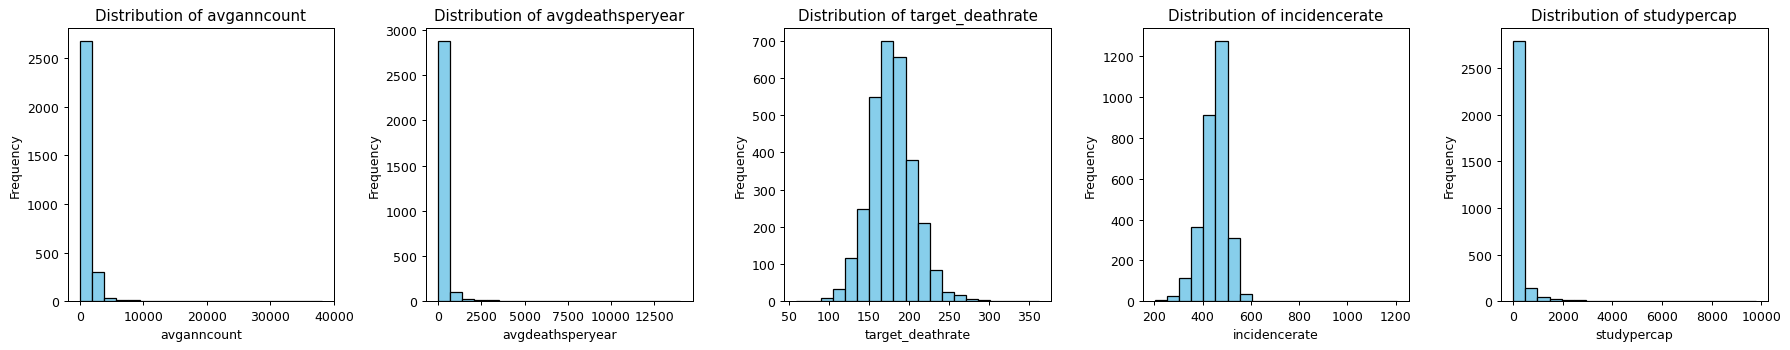

In [599]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), dpi=90)

for i, col in enumerate(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate', 'studypercap']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Các dữ liệu 'avganncount', 'avgdeathsperyear', 'studypercap' đều có phân phối lệch hẳn sang trái. Chứng tỏ các quận, thành phố đều có cùng mức trung bình các yếu tố này.

#### age

In [600]:
age.describe()

,medianage,medianagemale,medianagefemale
count,3047.000000,3047.000000,3047.000000
mean,45.272333,39.570725,42.145323
std,45.304480,5.226017,5.292849
min,22.300000,22.400000,22.300000
25%,37.700000,36.350000,39.100000
50%,41.000000,39.600000,42.400000
75%,44.000000,42.500000,45.300000
max,624.000000,64.700000,65.700000


Có sự sai sót trong dữ liệu 'medianage' khi mà max median age lên đến 624 là điều không thể xảy ra. Song, so sánh với max của medianagemale và medianagefemale, ta có thể kết luận max mediandge chỉ nên bé hơn 70. Tuy nhiên trên thực tế cũng có thể có những giá trị ngoài khoảng đó. Do đó, ta nên tiến hành loại bỏ các 'medianage' > 150.

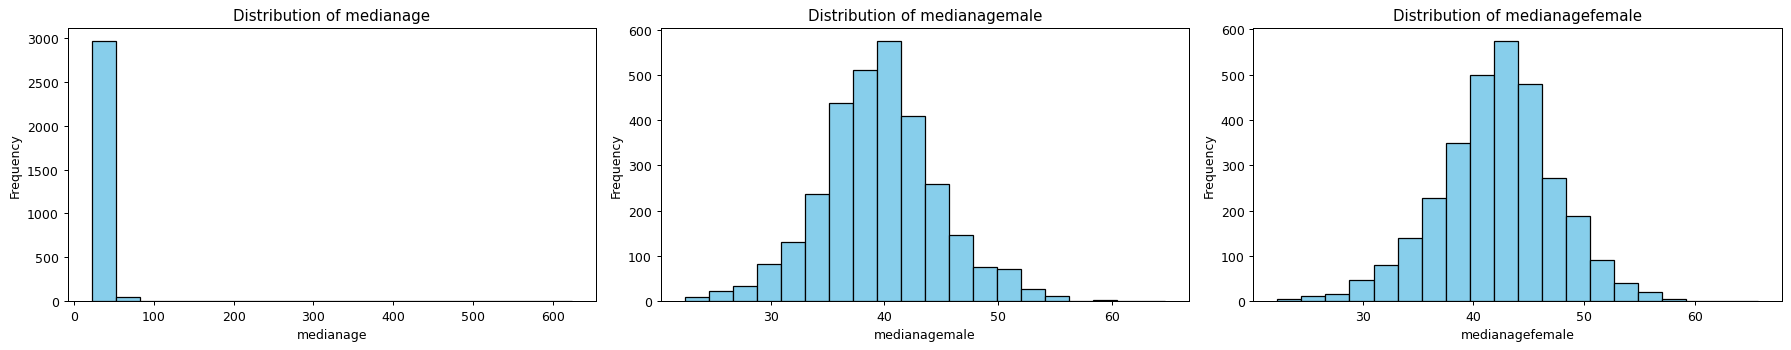

In [601]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), dpi=90)

for i, col in enumerate(['medianage',	'medianagemale', 'medianagefemale']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### income

In [602]:
income.describe()

,medincome,povertypercent
count,3047.000000,3047.000000
mean,47063.281917,16.878175
std,12040.090836,6.409087
min,22640.000000,3.200000
25%,38882.500000,12.150000
50%,45207.000000,15.900000
75%,52492.000000,20.400000
max,125635.000000,47.400000


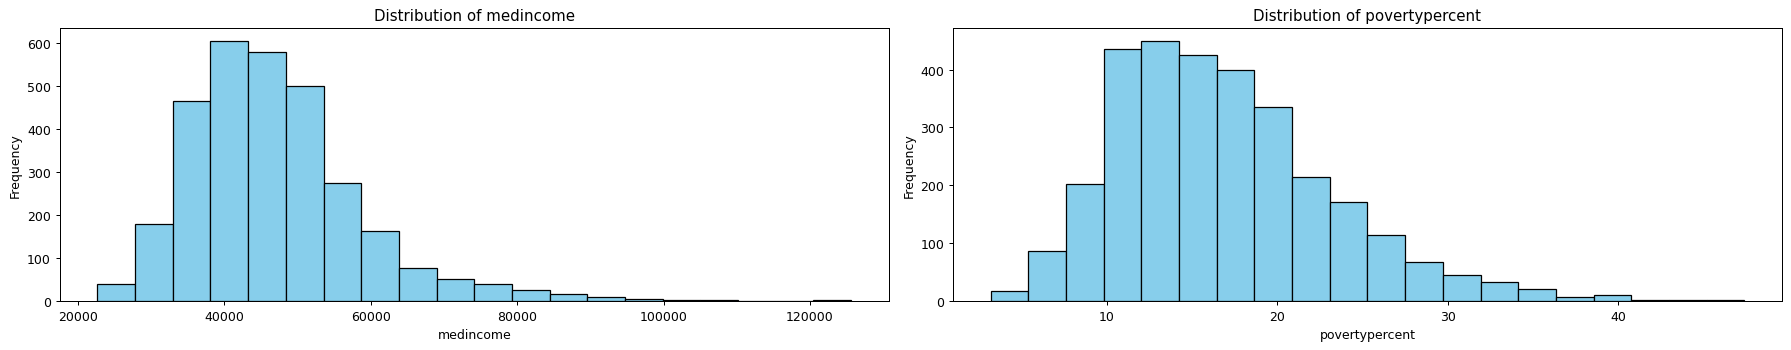

In [603]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=90)

for i, col in enumerate(['medincome', 'povertypercent']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### household

In [604]:
household.describe()

,avghouseholdsize,pctmarriedhouseholds,percentmarried
count,3047.000000,3047.000000,3047.000000
mean,2.529682,51.243872,51.773679
std,0.248449,6.572814,6.896928
min,1.860000,22.992490,23.100000
25%,2.380000,47.763063,47.750000
50%,2.500000,51.669941,52.400000
75%,2.640000,55.395132,56.400000
max,3.970000,78.075397,72.500000


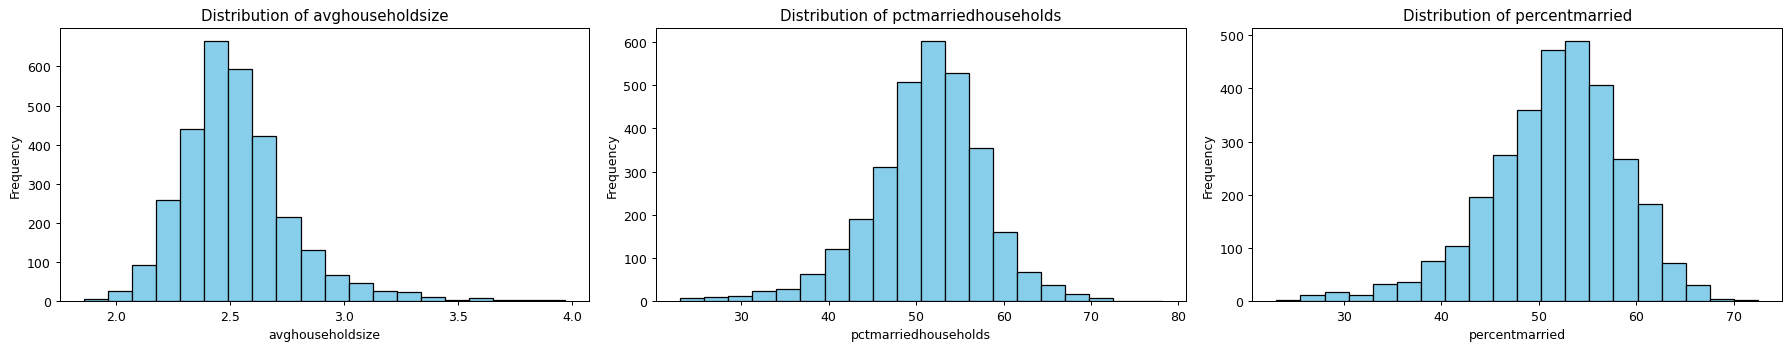

In [605]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), dpi=90)

for i, col in enumerate(['avghouseholdsize',	'pctmarriedhouseholds',	'percentmarried']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### education

In [606]:
education.describe()

,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over
count,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000
mean,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015
std,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756
min,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000
25%,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000
50%,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000
75%,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000
max,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000


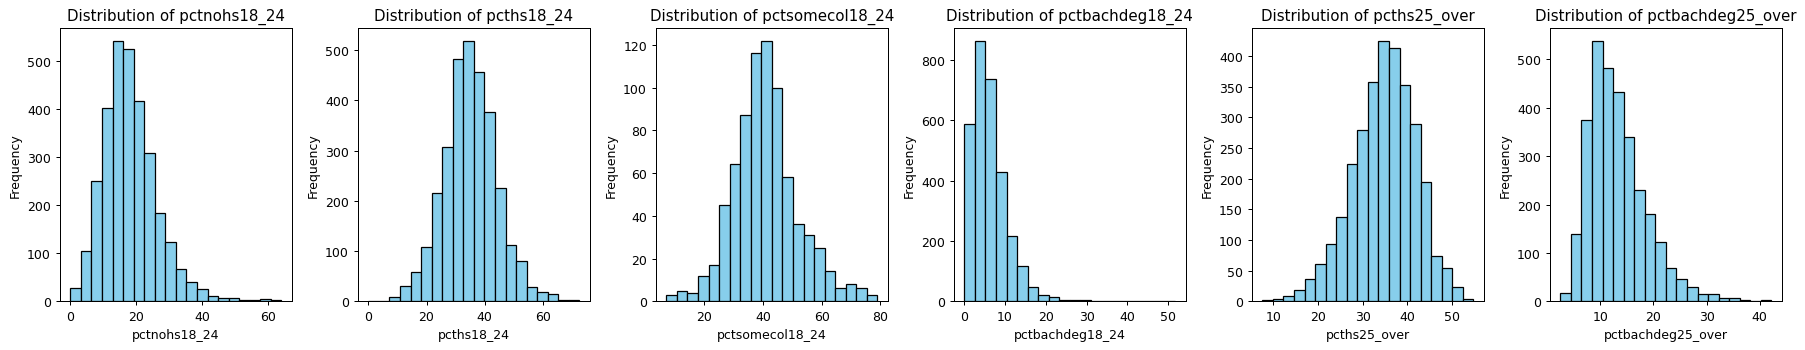

In [607]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 4), dpi=90)

for i, col in enumerate(['pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24',	'pcths25_over',	'pctbachdeg25_over']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### insurance_coverage

In [608]:
insurance_coverage.describe()

,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone
count,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000
mean,64.354939,48.453774,41.196324,36.252642,19.240072
std,10.647057,10.083006,9.447687,7.841741,6.113041
min,22.300000,15.700000,13.500000,11.200000,2.600000
25%,57.200000,41.000000,34.500000,30.900000,14.850000
50%,65.100000,48.700000,41.100000,36.300000,18.800000
75%,72.100000,55.600000,47.700000,41.550000,23.100000
max,92.300000,78.900000,70.700000,65.100000,46.600000


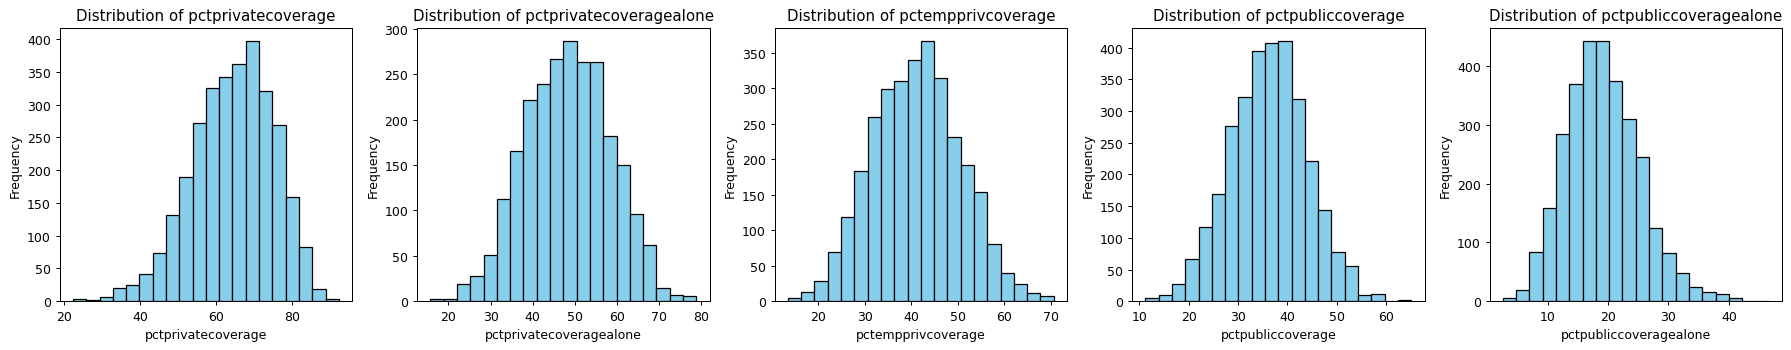

In [609]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), dpi=90)

for i, col in enumerate(['pctprivatecoverage',	'pctprivatecoveragealone',	'pctempprivcoverage',	'pctpubliccoverage',	'pctpubliccoveragealone']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### ethnicity

In [610]:
ethnicity.describe()

,pctwhite,pctblack,pctasian,pctotherrace
count,3047.000000,3047.000000,3047.000000,3047.000000
mean,83.645286,9.107978,1.253965,1.983523
std,16.380025,14.534538,2.610276,3.517710
min,10.199155,0.000000,0.000000,0.000000
25%,77.296180,0.620675,0.254199,0.295172
50%,90.059774,2.247576,0.549812,0.826185
75%,95.451693,10.509732,1.221037,2.177960
max,100.000000,85.947799,42.619425,41.930251


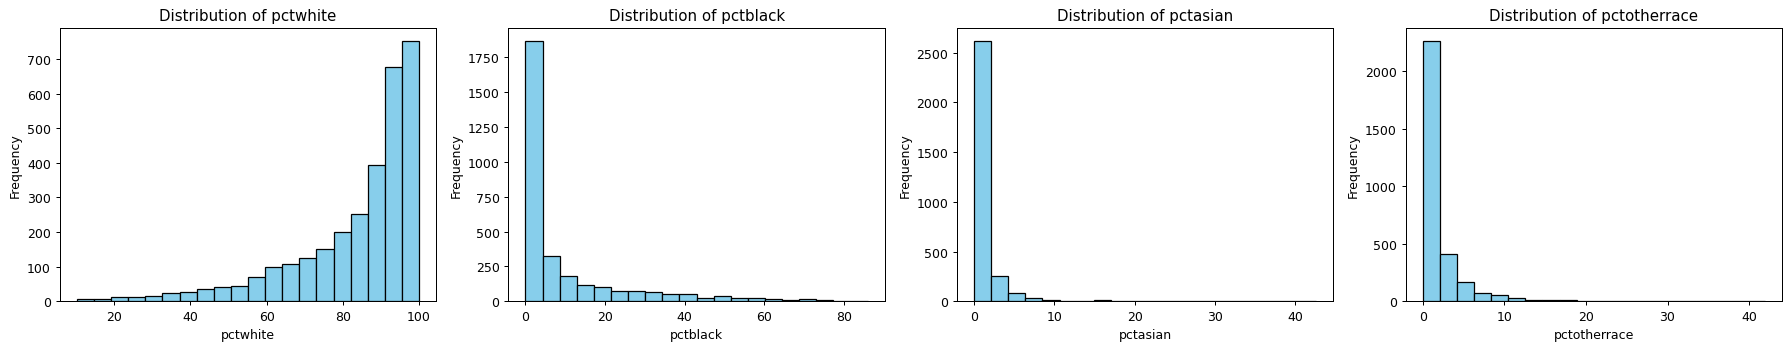

In [611]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4), dpi=90)

for i, col in enumerate(['pctwhite',	'pctblack',	'pctasian',	'pctotherrace']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Các yếu tố này là một nhóm các yếu tố bổ trợ cho nhau vì mỗi người chỉ có một màu da. Điều này có nghĩa là, the United States đa phần là người da trắng, số rất ít còn lại là người da đen, người da vàng và những người có màu da khác.

#### employment

In [612]:
employment.describe()

,pctemployed16_over,pctunemployed16_over
count,2895.000000,3047.000000
mean,54.152642,7.852412
std,8.315064,3.452371
min,17.600000,0.400000
25%,48.600000,5.500000
50%,54.500000,7.600000
75%,60.300000,9.700000
max,80.100000,29.400000


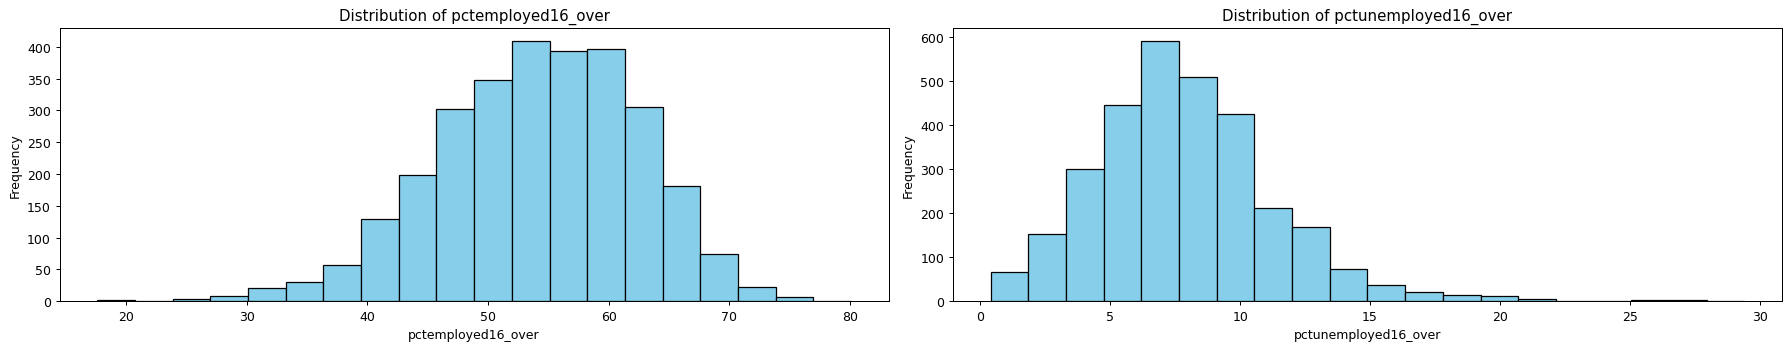

In [613]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=90)

for i, col in enumerate(['pctemployed16_over',	'pctunemployed16_over']):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data preprocessing

* Perform necessary data preprocessing steps such as handling missing values, scaling numerical features, and encoding categorical variables if applicable.


### remove error values

Xoá các dòng dữ liệu có meadianage > 150

In [614]:
# remove medianage > 150
df = df[df['medianage'] <= 150]
# reset index of df after remove
df = df.reset_index(drop=True)

### checking and handling missing value

In [615]:
# checking missing values of categorical variables
df.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2263
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          149
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     602
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarriedhouseholds          0
birthrat

Theo thống kê, không có categorical variables nào có missing value. Chỉ có 3 features của numerical variables chứa missing values, chúng ta cần tiến hành xử lý các giá trị này.

In [616]:
missing_values_col = ['pctsomecol18_24','pctemployed16_over','pctprivatecoveragealone']

In [617]:
# caculate missing values percentage each columns and get 2 decimal places
round((df[missing_values_col].isna().sum()/df[missing_values_col].shape[0]) *100,2)

pctsomecol18_24            75.01
pctemployed16_over          4.94
pctprivatecoveragealone    19.95
dtype: float64

Đầu tiên, với feature 'pctsomecol18_24', do mất dữ liệu đáng kể (75%), em quyết định xóa cột này.

In [618]:
# remove column
df.drop(columns=['pctsomecol18_24'], inplace=True, axis=1)

Còn việc xử lý giá trị thiếu ở 2 cột còn lại em tìm cách điền bằng cách thay thế giá trị mới bởi mean/median/mode.

Vì đây là dữ liệu được thống kê theo từng khu vực, do đó ta lợi dụng dạng dữ liệu số ['int64'] của 'statefips', 'countyfips' để phân nhóm điền missing values của numerical variables một cách thực tế hơn. Có nghĩa là, với mỗi khu vực khác nhau thì các missing value được tính toán để điền vào khác nhau.

Hãy cùng kiểm tra các giá trị ngoại lệ để quyết định cách thay thế các giá trị còn thiếu:

In [619]:
# caculate outlier percentage
def outlier_percentage(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df[column])) * 100

    return percentage_outliers

In [620]:
outlier_percentage(df, 'pctemployed16_over')

0.0

In [621]:
outlier_percentage(df, 'pctprivatecoveragealone')

0.0

Không có ngoại lệ, vì vậy em sử dụng phương pháp thay thế bằng **mean** dựa trên 'statefips':

In [622]:
# group to summarize data columns based on state
state_statistic = df.groupby('statefips').agg({
    'pctemployed16_over': 'mean',
    'pctprivatecoveragealone': 'mean'
}).reset_index()

# rename the column before merging back into the main df
state_statistic.rename(columns={
    'pctemployed16_over': 'mean_employed16_over',
    'pctprivatecoveragealone': 'mean_privatecoveragealone'
}, inplace=True)

In [623]:
state_statistic.head()

,statefips,mean_employed16_over,mean_privatecoveragealone
0,1,47.921667,45.136538
1,2,60.681250,44.481250
2,4,45.366667,36.853846
3,5,49.246479,39.644068
4,6,52.069091,45.841026


In [624]:
# merge back to the main df
df = pd.merge(df, state_statistic, on='statefips', how='left')

In [625]:
# impute missing 'pctemployed16_over' with mean
df.loc[df['pctemployed16_over'].isna(), 'pctemployed16_over'] = df['mean_employed16_over']

# impute missing 'pctprivatecoveragealone' with mean
df.loc[df['pctprivatecoveragealone'].isna(), 'pctprivatecoveragealone'] = df['mean_privatecoveragealone']

In [626]:
# checking again for missing value
df.isna().sum()

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
binnedinc                    0
medianage                    0
medianagemale                0
medianagefemale              0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over           0
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone      0
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrate                    0
statefips                    0
countyfi

In [627]:
# remove 'mean_employed16_over', 'mean_privatecoveragealone' columns
df.drop(columns=['mean_employed16_over', 'mean_privatecoveragealone'], inplace=True, axis=1)

Bây giờ chúng ta có thể thấy rằng không có giá trị nào bị thiếu trong tập dữ liệu.

### encoding categorical variables

In [628]:
df.describe(include=['object']).T

,count,unique,top,freq
binnedinc,3017,10,"(51046.4, 54545.6]",304


In [629]:
df['binnedinc']

0        (61494.5, 125635]
1       (48021.6, 51046.4]
2       (48021.6, 51046.4]
3         (42724.4, 45201]
4       (48021.6, 51046.4]
               ...        
3012      (45201, 48021.6]
3013    (48021.6, 51046.4]
3014    (51046.4, 54545.6]
3015    (48021.6, 51046.4]
3016    (40362.7, 42724.4]
Name: binnedinc, Length: 3017, dtype: object

In [630]:
unique_values = df['binnedinc'].value_counts()
print(unique_values)

binnedinc
(51046.4, 54545.6]    304
[22640, 34218.1]      304
(48021.6, 51046.4]    303
(42724.4, 45201]      303
(45201, 48021.6]      303
(54545.6, 61494.5]    302
(37413.8, 40362.7]    301
(40362.7, 42724.4]    301
(34218.1, 37413.8]    299
(61494.5, 125635]     297
Name: count, dtype: int64


'binnedinc' là một khoảng liên tục từ 22640 đến 125635 được chia thành 10 khoảng có thứ tự từ nhỏ đến lớn:
* ['[22640, 34218.1]',
'(34218.1, 37413.8]',
 '(37413.8, 40362.7]',
 '(40362.7, 42724.4]',
 '(42724.4, 45201]',
 '(45201, 48021.6]',
 '(48021.6, 51046.4]',
 '(51046.4, 54545.6]',
 '(54545.6, 61494.5]',
 '(61494.5, 125635]']

Em sử dụng LabelEncoder để encode dữ liệu này từ 1 đến 10 tương ứng từ nhỏ đến lớn.

In [631]:
# ordered aray
ordered_binnedinc = ['[22640, 34218.1]', '(34218.1, 37413.8]', '(37413.8, 40362.7]', '(40362.7, 42724.4]', '(42724.4, 45201]', '(45201, 48021.6]', '(48021.6, 51046.4]', '(51046.4, 54545.6]', '(54545.6, 61494.5]', '(61494.5, 125635]']

binnedinc_mapping = {'[22640, 34218.1]':1, '(34218.1, 37413.8]':2, '(37413.8, 40362.7]':3, '(40362.7, 42724.4]':4, '(42724.4, 45201]':5, '(45201, 48021.6]':6, '(48021.6, 51046.4]':7, '(51046.4, 54545.6]':8, '(54545.6, 61494.5]':9, '(61494.5, 125635]':10}

# LabelEncoder
df['binnedinc'] = df['binnedinc'].map(binnedinc_mapping)

In [632]:
df['binnedinc']

0       10
1        7
2        7
3        5
4        7
        ..
3012     6
3013     7
3014     8
3015     7
3016     4
Name: binnedinc, Length: 3017, dtype: int64

Vậy là, chúng ta đã chuyển đồi thành công dữ liệu 'binnedinc' sang dạng dữ liệu số có thứ tự.

### final data

In [633]:
df.to_csv('preprocessed_data.csv', index=False)

### split data into features and target

In [634]:
# load dataset
df_preprocessed = pd.read_csv('/content/preprocessed_data.csv')

In [635]:
# setting feature and target variable
y_target = df_preprocessed['target_deathrate']
X = df_preprocessed.drop(['target_deathrate'], axis=1)

In [636]:
X.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1397.0,469,489.8,61898,260131,11.2,499.748204,10,39.3,36.9,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54
1,173.0,70,411.6,48127,43269,18.6,23.111234,7,33.0,32.2,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34
2,102.0,50,349.7,49348,21026,14.6,47.560164,7,45.0,44.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62
3,427.0,202,430.4,44243,75882,17.1,342.637253,5,42.8,42.2,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52
4,57.0,26,350.1,49955,10321,12.5,0.000000,7,48.3,47.8,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34


In [637]:
y_target

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3012    149.6
3013    150.1
3014    153.9
3015    175.0
3016    213.6
Name: target_deathrate, Length: 3017, dtype: float64

### scale data

In [638]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

## **Implement PCA:**
* Utilize scikit-learn to implement PCA on the preprocessed dataset.
* Experiment with different numbers of principal components.
* Visualize the explained variance ratio to understand the amount of variance captured by each principal component.


In [639]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)
X_pca = pca.fit_transform(X_std)

In [640]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
0,2.619086,1.009689,0.714523,0.250100,-0.075787,0.598016,-0.548656,0.058368,1.629387,-1.185892,...,-0.285225,-0.213181,-0.313697,-0.076872,0.251814,0.086661,-0.151181,-0.020242,0.092303,-0.028110
1,1.958708,2.214409,-1.077167,-1.583725,-1.225294,0.964648,1.502548,-1.558899,0.043880,-1.451371,...,0.136306,0.114059,-0.224957,-0.150269,-0.065646,-0.173877,0.074888,0.010159,-0.153866,-0.032988
2,-0.181700,-1.410305,0.478052,1.082914,-2.184053,0.507526,-0.420610,-1.313914,0.902097,-0.621716,...,-0.328172,0.023439,-0.295451,0.119491,-0.066366,-0.218898,-0.154686,0.042526,0.039472,-0.043904
3,-1.942008,-0.840664,0.509238,0.836910,-0.051165,0.669199,0.057167,-0.826936,1.336800,-0.742835,...,-0.163770,-0.000912,0.037001,0.054116,0.063919,-0.250756,0.025444,-0.051901,0.019039,0.011332
4,-0.375052,-3.082615,0.872578,1.196093,-1.442396,0.793276,-0.438157,0.020209,0.551293,-1.717509,...,0.008859,0.114404,0.030252,0.182296,-0.344120,-0.258466,-0.147226,0.046978,0.027563,0.015891
5,-1.412987,-0.835122,1.020307,0.736232,-0.639154,0.150906,-1.000606,-0.373817,1.268254,0.102652,...,0.077926,-0.013342,-0.258263,-0.113310,0.139230,0.189078,-0.083671,0.043547,-0.105951,0.019818
6,-3.002710,-0.326358,0.532205,1.296206,-1.370568,0.900874,0.159680,-1.131263,0.885736,-0.610174,...,0.187907,-0.366202,-0.113909,0.225584,0.062302,-0.003363,0.270161,-0.045847,0.052452,0.033061
7,-3.267393,-2.856807,2.251927,0.909062,-2.315143,0.702023,-0.123160,-0.156073,0.491287,-0.655291,...,-0.162442,-0.051009,0.188038,0.120695,0.004764,-0.279330,-0.007563,0.017262,-0.053018,-0.018685
8,-3.249851,-2.700176,1.352351,1.155487,-1.087378,0.364981,-0.484490,-0.218697,0.584457,-0.071390,...,0.299909,-0.138824,-0.191735,0.087953,-0.018546,-0.248415,-0.074396,0.031702,0.186620,-0.045305
9,2.416944,3.457228,2.090511,1.412277,1.518634,1.065087,-0.339416,0.081120,0.630420,-0.682565,...,-0.123450,-0.295091,-0.152256,-0.115732,0.133033,-0.158374,-0.010749,-0.052091,0.092092,0.006347


Quan sát X_pca df, ta thấy các feature trong dữ liệu gốc đã được PCA xử lý thành các Principal Components với các hệ toạ độ trực giao khác nhau.

In [641]:
explained_variance_ratio = pca.explained_variance_ratio_

* explained_variance_ratio: đây là tỷ lệ phần trăm lượng biến thiên được giải thích bởi từng thành phần chính. Principal Component đầu tiên sẽ có tỷ lệ cao nhất và giảm dần về phía cuối.

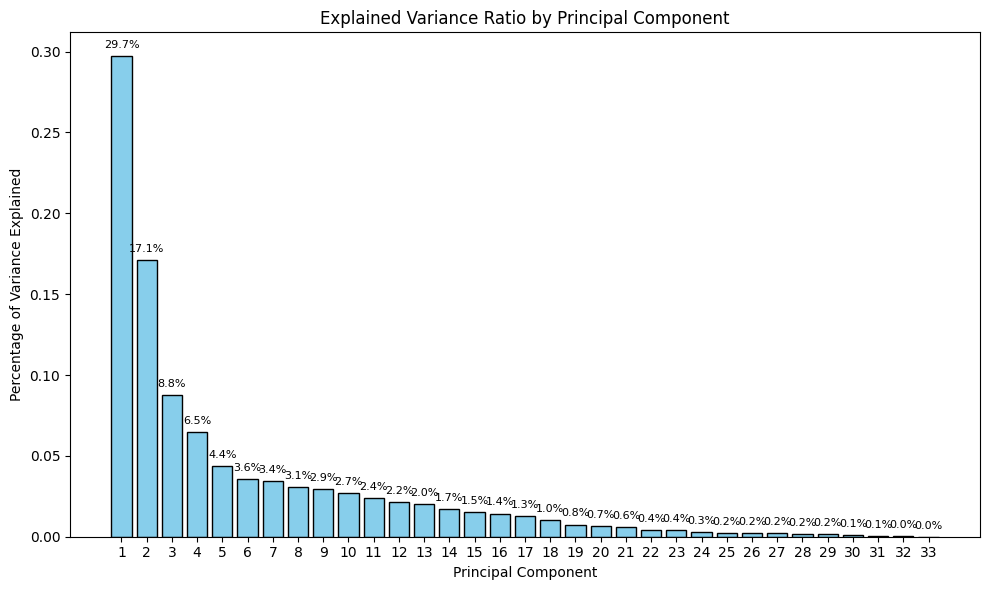

In [642]:
components = range(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance_ratio, color='skyblue', edgecolor='black')

# Hiển thị số phần trăm trên mỗi thanh chữ nhật
for i, (component, eigenvals) in enumerate(zip(components, pca.explained_variance_ratio_)):
    plt.text(component, eigenvals + 0.005, f'{eigenvals:.1%}', ha='center', fontsize=8)

plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(components)
plt.tight_layout()
plt.show()

Như vậy, phần trăm lượng biến thiên được giải thích bằng PC1 gần 30%, PC2 là 17.1% và từ PC18 trở về sau có phần trăm giảm dần gần như bằng 0%.

Điều này chứng tỏ nhờ có PCA tạo một hệ trực giao mới, chúng ta có thể giảm bớt số chiều đầu vào không mấy quan trọng của dữ liệu để đơn giản hoá mô hình học máy mà không làm mất mát quá nhiều thông tin của dữ liệu.

In [643]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

cumsum: đây là tỷ lệ phương sai tích luỹ, thể hiện tỷ lệ phần trăm thông tin được giữ lại theo số components.

In [644]:
cumsum

array([0.29708345, 0.46824122, 0.5558034 , 0.62040961, 0.66417338,
       0.69988311, 0.73411205, 0.76471999, 0.7939695 , 0.82071364,
       0.84466559, 0.86632745, 0.88675668, 0.90413792, 0.91948436,
       0.93380353, 0.94658721, 0.95668077, 0.96419757, 0.97101003,
       0.97713872, 0.98109   , 0.98497246, 0.98777422, 0.99023459,
       0.99243112, 0.99450393, 0.99623321, 0.99790156, 0.9988724 ,
       0.99942693, 0.99992552, 1.        ])

Để giữ lại 70-80% lượng thông tin của dữ liệu, ta cần ít nhất 7 components trở lên. Ở đây, ta có thể thấy có sự đánh đổi giữa số chiều và lượng thông tin mất mát trong kỹ thuật PCA, càng giảm đi số chiều thì lượng thông tin được giữ lại cũng sẽ bị thất thoát theo.

Tuy nhiên, việc thất thoát đi một lượng ít thông tin đổi lại số chiều được giảm đi đáng kể lại là một dấu hiệu tốt. Lúc này, PCA được thực hiện có hiệu quả.

In [645]:
eigenvals = np.array(pca.explained_variance_)

In [646]:
eigenvals

array([9.80700428e+00, 5.65007934e+00, 2.89050984e+00, 2.13271186e+00,
       1.44468349e+00, 1.17881170e+00, 1.12992969e+00, 1.01039670e+00,
       9.65553803e-01, 8.82849378e-01, 7.90676472e-01, 7.15078206e-01,
       6.74388144e-01, 5.73771183e-01, 5.06600409e-01, 4.72689300e-01,
       4.22001436e-01, 3.33197928e-01, 2.48136422e-01, 2.24885772e-01,
       2.02313971e-01, 1.30435478e-01, 1.28163745e-01, 9.24885263e-02,
       8.12193218e-02, 7.25095298e-02, 6.84251447e-02, 5.70853307e-02,
       5.50737948e-02, 3.20482177e-02, 1.83055071e-02, 1.64590472e-02,
       2.45867227e-03])

<ipython-input-647-f5c44a8ae9a1>:16: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  axes[0].set_xlim(0,31,1)
<ipython-input-647-f5c44a8ae9a1>:17: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  axes[1].set_xlim(0,31,1)


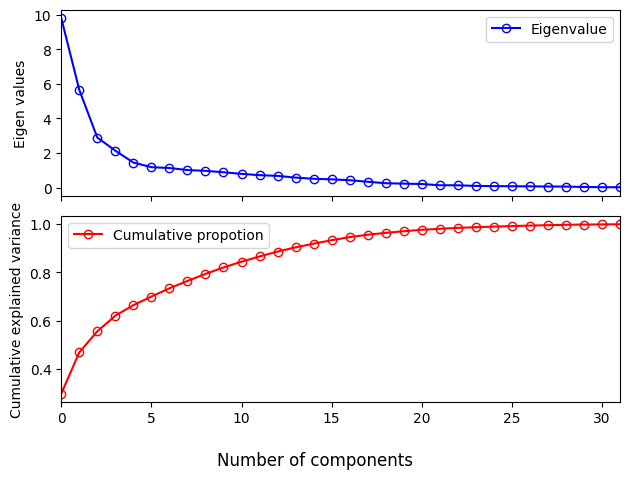

In [647]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True)

# vẽ đồ thị line-plot
axes[0].plot(range(len(eigenvals)), eigenvals, marker='o', markerfacecolor='none', color = 'b', label = 'Eigenvalue')
axes[1].plot(range(len(cumsum)), cumsum, marker='o', markerfacecolor='none', color = 'r', label = 'Cumulative propotion')

# hiển thị nhãn cho trục tung
axes[0].set_ylabel('Eigen values')
axes[1].set_ylabel('Cumulative explained variance')

# hiển thị mô tả của đồ thị
axes[0].legend()
axes[1].legend()

# tạo lưới
axes[0].set_xlim(0,31,1)
axes[1].set_xlim(0,31,1)

# tạo tiêu đề chung cho figure
fig.supxlabel('Number of components')
plt.tight_layout()
plt.show()

Nhận xét:

Đồ thị khá thoải, dẫn đến việc ta cần nhiều trị riêng/vector riêng để giữ nhiều thông tin của dữ liệu.

## **Dimensionality Reduction:**
* Apply PCA to reduce the dimensionality of the dataset and find a suitable number of dimensions to keep the information.
* Compare the performance of machine learning models (e.g., linear regression or others) on both the original and reduced-dimensional datasets using appropriate evaluation metrics for the problem.

In [648]:
y_target

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3012    149.6
3013    150.1
3014    153.9
3015    175.0
3016    213.6
Name: target_deathrate, Length: 3017, dtype: float64

**Reduce dimension by PCA**

In [649]:
# find a suitable number of dimensions to keep the information
d = np.argmax(cumsum >= 0.9) + 1
print('The number of dimensions required to preserve 90% of information is',d)

The number of dimensions required to preserve 90% of information is 14


In [650]:
# apply PCA and reduce the dimensionality of the dataset
pca = PCA(n_components=d)
X_pca = pca.fit_transform(X_std)

**With reduced-dimensional dataset:**

In [651]:
pca = PCA(n_components=d)
X_pca = pca.fit_transform(X_std)

# split data to separate training and test set
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_target, test_size = 0.2, random_state = 42)

In [652]:
from sklearn.linear_model import LinearRegression

# initialize a linear regression model
lr_pca = LinearRegression(fit_intercept=True)

# train model using training data X_train, y_train
lr_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

**With original dataset**

In [653]:
# split data to separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y_target, test_size = 0.2, random_state = 42)

In [654]:
from sklearn.linear_model import LinearRegression

# initialize a linear regression model
lr_origin = LinearRegression(fit_intercept=True)

# train model using training data X_train, y_train
lr_origin.fit(X_train, y_train)

LinearRegression()

**Compare:**

In [655]:
# evaluate the trained model using appropriate metrics: MSE, MAE, R-squared
from sklearn import metrics

# computing and return DataFrame of appropriate metrics function
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name]).T

In [656]:
pca_evaluation = model_evaluation(lr_pca, X_test_pca, y_test_pca, 'PCA')
without_pca_evaluation = model_evaluation(lr_origin, X_test, y_test, 'Without PCA')

comp = pd.concat([pca_evaluation, without_pca_evaluation], axis=0)

In [657]:
comp

,MAE,MSE,RMSE,R2-Score
PCA,15.247807,423.186657,20.571501,0.471063
Without PCA,14.528920,399.633843,19.990844,0.500501


**Nhận xét:**
* Hiệu suất mô hình Without PCA với r2_score 0.5 cao hơn mô hình có PCA với r2_score 0.471.

**Nguyên nhân:**
* Bản thân mục đích chính của kỹ thuật PCA là giúp giảm chiều dữ liệu. Trong các tập dữ liệu có số lượng biến lớn, các biến có thể không độc lập hoặc chứa thông tin trùng lặp. PCA biến mẫu dữ liệu gốc (X1,..,Xn) có độ tương quan với nhau thành một mẫu (y1,..,yn) có độ tương quan ít hơn và chọn ra những biến có độ đóng góp lớn, giúp giảm số lượng biến gốc xuống một số lượng biến nhỏ hơn trong một hệ toạ độ mới.
* Việc PCA cải thiện hiệu suất mô hình học máy không phải lúc nào cũng được thực hiện. Vì PCA chỉ có thể giúp giảm thiểu nhiễu trong dữ liệu bằng cách giữ lại các thành phần chính quan trọng, loại bỏ các thành phần chính có độ biến động thấp.
* Tuy nhiên, nếu các biến có độ độc lập cao thì việc triển khai PCA bị kém hiệu quả.
* Quay lại heatmap thể hiện correlation phía trên, ta thấy các biến trong nhóm có độ tương quan cao, tuy nhiên giữa các nhóm với nhau lại có độ tương quan vô cùng thấp, hay nói cách khác là chúng có một sự độc lập nhất định. Do đó mà việc sử dụng PCA trong trường hợp này để cải thiện hiệu suất mô hình không được quá hiệu quả.

*Tuy nhiên, PCA đã rất thành công trong việc **giảm độ phức tạp của mô hình**, **tăng khả năng tính toán** khi mà chỉ với 14 chiều, mô hình học máy đã đạt được 0.47, chỉ kém hơn 0.03, trong khi số chiều của origin lên đến tận 33 chiều. Số chiều 14 sau khi PCA cũng giữ được đến hơn 90% thông tin của dữ liệu.*

## **Interpretation and Analysis:**
* Analyze the results obtained from the PCA transformation and dimensionality reduction.
* Interpret the principal components and their corresponding eigenvectors to understand the underlying structure of the data.
* Discuss any trade-offs observed between dimensionality reduction and model performance.

In [658]:
pca = PCA(n_components=d)
X_pca = pca.fit_transform(X_std)

Interpret the principal components and their corresponding eigenvectors to understand the underlying structure of the data.

In [659]:
# eigenvevctors
eigenvecs = pca.components_

# convert to get index for loading dataframe
X_std_transposed = X_std.T

# load coefficient df
loading = pd.DataFrame(eigenvecs.T, columns=["PC{}".format(i+1) for i in range(eigenvecs.shape[0])])
loading = loading.set_index(X_std_transposed.index)

In [660]:
loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
avganncount,0.092340,0.204955,0.387189,0.227439,0.171369,0.075709,0.068886,0.072878,-0.135455,0.046356,-0.057304,-0.045229,-0.014474,-0.078034
avgdeathsperyear,0.071061,0.225156,0.393661,0.228102,0.178956,0.105470,0.036161,0.022366,-0.115671,0.017194,-0.075963,-0.077847,-0.040575,-0.071525
incidencerate,0.002113,0.013832,0.092576,-0.281800,0.480615,-0.029576,-0.026392,0.038550,0.038173,0.199868,0.299083,0.611784,-0.306840,-0.008902
medincome,0.279741,0.040679,0.000974,0.061846,-0.041501,-0.112276,-0.262741,0.012403,0.134673,0.016003,0.078885,0.042271,-0.109646,0.024626
popest2015,0.074899,0.230835,0.371251,0.254560,0.165821,0.105489,0.036999,0.019262,-0.118365,0.017197,-0.072857,-0.097015,-0.027067,-0.057363
povertypercent,-0.276882,0.138633,-0.020455,-0.071078,-0.016337,0.034953,0.119127,-0.048321,-0.045839,-0.031117,0.000117,-0.065045,-0.023985,0.039629
studypercap,0.030792,0.026986,0.045391,-0.082463,0.073921,0.110323,0.341575,0.445609,0.732430,0.216224,-0.219715,-0.107635,0.037928,0.033645
binnedinc,0.283440,0.011826,-0.015374,0.059289,0.015765,-0.083061,-0.190180,0.059425,0.088692,0.008733,0.011881,0.085524,-0.054434,-0.098650
medianage,-0.038234,-0.330328,0.313543,-0.006964,-0.137704,-0.009428,-0.156994,0.059247,0.057480,0.023855,0.027473,0.029899,-0.000302,0.001733
medianagemale,-0.029317,-0.329820,0.301968,0.007069,-0.139341,-0.012900,-0.149381,0.034931,0.067084,0.025332,0.040783,0.031743,-0.004347,0.010698


loading df bên trên là bảng chứa thông tin về các hệ số tải của từng biến trong dữ liệu gốc đối với từng components. Trong PCA, các hệ số này đại diện cho độ đóng góp của biến đầu vào trong dữ liệu gốc trong component đó, cũng như là mức độ quan trọng của biến này trong dữ liệu gốc.

Đến đây, ta có thể khám phá được cấu trúc ẩn bên trong của dữ liệu khi phát hiện ra biến nào có sự ảnh hưởng cao thông qua eigenvectors khi PCA.

In [661]:
for column in loading.columns:
    # remove the direction of the variables
    loading = abs(loading)

    # find the names of the variables that contribute the most in each component
    top_5_index = loading[column].nlargest(5).index
    top_5_vars = ", ".join(top_5_index.tolist())
    print(f"{column}: {top_5_vars}")

PC1: pctprivatecoverage, binnedinc, pctpubliccoveragealone, medincome, pctprivatecoveragealone
PC2: medianage, medianagemale, medianagefemale, pctwhite, percentmarried
PC3: avgdeathsperyear, avganncount, popest2015, medianagefemale, medianage
PC4: pctotherrace, pctmarriedhouseholds, avghouseholdsize, incidencerate, percentmarried
PC5: incidencerate, pcths25_over, pcths18_24, pctbachdeg25_over, pctotherrace
PC6: statefips, countyfips, pctnohs18_24, pctunemployed16_over, pcths18_24
PC7: pctblack, pctwhite, pcths18_24, studypercap, medincome
PC8: birthrate, studypercap, pctblack, pctnohs18_24, pctwhite
PC9: studypercap, pcths18_24, birthrate, pctasian, avghouseholdsize
PC10: countyfips, statefips, birthrate, pctnohs18_24, pcths18_24
PC11: countyfips, pctnohs18_24, birthrate, incidencerate, pctasian
PC12: pctotherrace, incidencerate, pctnohs18_24, countyfips, statefips
PC13: statefips, pctotherrace, incidencerate, pcths18_24, pctnohs18_24
PC14: pctasian, pcths25_over, pctbachdeg18_24, pctn

Như vậy, trên đây là 5 yếu tố có độ đóng góp nhiều nhất trong từng component. Ta có thể thấy, những yếu tố trong nhóm insurance_coverage, income, age có mức độ đóng góp cao. Trong khi các yếu tố thuộc nhóm education có độ đóng góp thấp hơn.

Discuss any trade-offs observed between dimensionality reduction and model performance.

* Như đã đề cập bên trên, việc giảm chiều của dữ liệu sẽ đi kèm với sự mất mát thông tin dữ liệu, điều này làm cho hiệu suất của mô hình học máy cũng giảm theo do mất đi một vài thông tin. Thậm chí, có thể làm cho mô hình dự đoán bị sai lệch đi đáng kể, nếu kỹ thuật PCA được thực hiện không tốt và kém hiệu quả, lúc giảm độ tương quan giữa các biến dữ liệu đầu vào đã làm mất đi các thông tin quan trọng.

* Ngược lại, nếu PCA được triển khai phù hợp và hiệu quả, PCA có thể giúp làm giảm nhiễu khi tìm được hệ trục toạ độ thể hiện được nhiều nhất các dữ liệu và loại bỏ được các thông tin không quan trọng. Từ đó, cho ra mô hình học máy có hiệu suất tốt hơn dữ liệu gốc.

## **Report**

### **1. Conclusion my findings:**
- Sau khi triển khai PCA trên tập dữ liệu và tiến hành khám phá dữ liệu, số chiều có thể giữ lại 90% thông tin dữ liệu là 14. Và hiệu suất mô hình dựa vào việc giảm chiều này đạt 0.47 r2_scores, thấp hơn dữ liệu gốc 0.03 nhưng lại giảm được số chiều đáng kể từ 33 về 14.
- Ngoài ra, khi sử dụng PCA, em còn khám phá được cấu trúc bên trong của dữ liệu khi nhìn ra được các features quan trọng trong dữ liệu gốc bằng cách xem xét các vecto riêng. Với tập dữ liệu này, các features quan trọng nhất thuộc các nhóm: insurance_coverage, income và age.

### **2. Methodology:**
#### 2.1 Data Preprocesing:
- Merge data: Gộp 2 tệp dữ liệu thông qua cột 'geography'.
- Handling missing values: Xử lý các missing values thông qua loại bỏ hoặc điền vào giá trị mean của cột dựa trên nhóm khu vực state.
- Encode categorical variables: đổi dạng của 'binnedinc' thành numeric bằng kỹ thuật LabelEncoder để đưa vào PCA.
- Split feature and target
- Scaling data: dùng StandardScaler để chuẩn hoá dữ liệu đầu vào về cùng khoảng giá trị.

#### 2.2 Implement PCA:
- Dùng thư viện sklearn để triển khai PCA trên dữ liệu đã xử lý

#### 2.3 Evaluate the PCA technique on the data set:
- Đánh giá thông qua việc giảm chiều và lượng thông tin giữ lại: dùng explain_variance_ratio để xem tỷ lệ biến thiên được giải thích bởi hệ principal components mới.
- Đánh giá thông qua hiệu suất mô hình học máy: dùng evaluate metrics: MSE, r2_scores để đánh giá và giải thích.

#### 2.4 Explore structure of data by PCA:
- Xuất và quan sát các eigenvectors của PCA để khám phá cấu trúc tiềm ẩn của dữ liệu.

### **3. Insights gained from the assignment:**
- Insight 1: Phải chuẩn bị dữ liệu trước khi PCA, vì PCA nhạy cảm với các khoảng giá trị, do đó phải chuẩn hoá dữ liệu trước khi đưa vào PCA.
- Insight 2: Quan sát độ tương quan của các biến trong dữ liệu xem chúng có phù hợp để làm PCA hay không.
- Insight 3: Việc quyết định giảm bao nhiêu chiều dựa vào tính chủ quan của người phân tích và mục đích phân tích. Có thể có người lấy 70-80% hoặc cũng có người muốn đến 90%.

### **4. The importance of PCA:**
- *Dimensionality reduction:* Các tập dữ liệu thực tế thường chứa một lượng lớn biến, nhiều trong số đó có thể có mối tương quan hoặc lặp lại. Số chiều cao này có thể dẫn đến thách thức trong việc trực quan hóa, giải thích và hiệu suất tính toán. PCA cho phép giảm số lượng biến trong khi vẫn giữ lại hầu hết thông tin quan trọng trong dữ liệu. Bằng cách đại diện cho dữ liệu dưới dạng một tập hợp nhỏ hơn các thành phần chính, PCA đơn giản hóa quá trình phân tích mà không mất thông tin quan trọng.
- *Underlying structure of data:* Trong phân tích dữ liệu thực tế, việc hiểu cấu trúc hoặc mẫu tiềm ẩn trong dữ liệu là cực kỳ quan trọng để đưa ra những diễn giải và quyết định có ý nghĩa. PCA cung cấp một biểu diễn dễ hiểu hơn về dữ liệu bằng cách xác định các hướng (các thành phần chính) mà dữ liệu biến động nhiều nhất. Các thành phần chính này đại diện cho các mẫu hoặc tổ hợp của các biến mà nắm giữ nhiều nhất các nguồn biến động quan trọng trong dữ liệu, giúp việc diễn giải và hiểu các tập dữ liệu phức tạp trở nên dễ dàng hơn.
- *Speeding up Computational Processes:* Phân tích các tập dữ liệu có số chiều cao có thể tốn nhiều thời gian và công suất tính toán. PCA giảm bớt gánh nặng tính toán bằng cách giảm số chiều của dữ liệu, cho phép xử lý, huấn luyện mô hình và suy luận nhanh hơn. Sự hiệu quả này đặc biệt quan trọng trong các ứng dụng thực tế nơi phân tích dữ liệu quy mô lớn là cần thiết, chẳng hạn như trong tài chính, chăm sóc sức khỏe, xử lý hình ảnh và xử lý ngôn ngữ tự nhiên.

Tóm lại, PCA là một kỹ thuật mạnh mẽ để giảm số chiều dữ liệu có ảnh hưởng đáng kể trong phân tích dữ liệu thực tế. Bằng cách giảm độ phức tạp của các tập dữ liệu đa chiều trong khi vẫn giữ lại thông tin quan trọng, PCA tạo điều kiện cho việc phân tích dữ liệu hiệu quả, dễ hiểu và mở rộng được áp dụng trong nhiều lĩnh vực và ứng dụng khác nhau.